<a href="https://colab.research.google.com/github/dhanush-suresh/MachineLearningTemplate/blob/main/Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
data = pd.read_csv("Salary_Data.csv")

In [5]:
print(data)

    YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0


In [6]:
X = data.iloc[:,0:-1].values

In [7]:
y = data.iloc[:,-1].values

In [8]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [9]:
print(y)

[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


In [13]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan,strategy = "mean")
x = imputer.fit_transform(X)
y = imputer.fit_transform(y.reshape(-1,1))

In [14]:
print(y)

[[ 39343.]
 [ 46205.]
 [ 37731.]
 [ 43525.]
 [ 39891.]
 [ 56642.]
 [ 60150.]
 [ 54445.]
 [ 64445.]
 [ 57189.]
 [ 63218.]
 [ 55794.]
 [ 56957.]
 [ 57081.]
 [ 61111.]
 [ 67938.]
 [ 66029.]
 [ 83088.]
 [ 81363.]
 [ 93940.]
 [ 91738.]
 [ 98273.]
 [101302.]
 [113812.]
 [109431.]
 [105582.]
 [116969.]
 [112635.]
 [122391.]
 [121872.]]


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer([("encoder",OneHotEncoder(),[0])],remainder= "passthrough")
X = ct.fit_transform(X)

In [ ]:
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y)

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [32]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [33]:
regressor.fit(X_train,y_train)

LinearRegression()

In [34]:
y_pred = regressor.predict(X_test)

In [35]:
y_pred

array([[115573.62288352],
       [ 71679.93878159],
       [102498.90847018],
       [ 75415.57147111],
       [ 55803.4998511 ],
       [ 60473.04071301],
       [122110.98009019],
       [107168.44933209],
       [ 63274.76523015]])

In [36]:
y_test

array([[112635.],
       [ 67938.],
       [113812.],
       [ 83088.],
       [ 64445.],
       [ 57189.],
       [122391.],
       [109431.],
       [ 56957.]])

Text(0, 0.5, 'Salary')

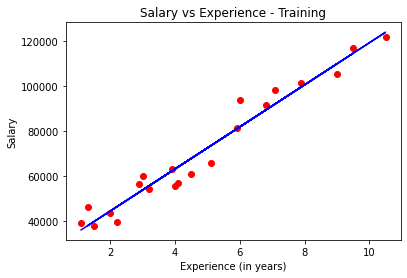

In [40]:
plt.scatter(X_train,y_train,color="Red")
plt.plot(X_train,regressor.predict(X_train),color = "blue")
plt.title("Salary vs Experience - Training")
plt.xlabel("Experience (in years)")
plt.ylabel("Salary")

Text(0, 0.5, 'Salary')

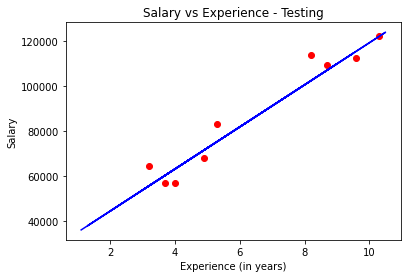

In [43]:
plt.scatter(X_test,y_test,color="Red")
plt.plot(X_train,regressor.predict(X_train),color = "blue")
plt.title("Salary vs Experience - Testing")
plt.xlabel("Experience (in years)")
plt.ylabel("Salary")